# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

# Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

    сalls — количество звонков,
    minutes — суммарная длительность звонков в минутах,
    messages — количество sms-сообщений,
    mb_used — израсходованный интернет-трафик в Мб,
    is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.shape

(3214, 5)

Пропусков нет

## Разбейте данные на выборки

In [5]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [6]:
x, features_test, y, target_test  = train_test_split(features, target, test_size = 0.2, random_state = 12345)

In [7]:
features_train, features_valid, target_train, target_valid = train_test_split(x, y, test_size = 0.2, random_state = 12345)

## Исследуйте модели

# Линейная регрессия

# Случайный лес

In [8]:
model_rf = RandomForestClassifier(random_state=12345)
parametrs = {
    'n_estimators': range(1,21,5),
    'max_depth': range(1,15,2)
}
grid_rf = GridSearchCV(model_rf, parametrs, cv=5)
grid_rf.fit(features_train, target_train)
grid_rf.best_params_

{'max_depth': 5, 'n_estimators': 16}

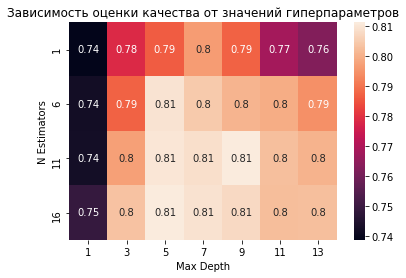

In [9]:
results = grid_rf.cv_results_
rf = pd.DataFrame({'n_estimators': results['param_n_estimators'], 
                   'max_depth': results['param_max_depth'], 
                   'mean_score': results['mean_test_score']})
rf['n_estimators'] = rf['n_estimators'].astype(int)
rf['max_depth'] = rf['max_depth'].astype(int)
scores = rf.pivot('n_estimators', 'max_depth', 'mean_score')
sns.heatmap(scores, annot=True)
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.title('Зависимость оценки качества от значений гиперпараметров')
plt.show()

In [10]:
predictions = grid_rf.predict(features_valid)
accuracy_rf = accuracy_score(target_valid, predictions)
accuracy_rf

0.7669902912621359

# Логистичсекая регрессия

In [11]:
model_lr = LogisticRegression(random_state=12345)
parametrs_lr = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': range(1,1000,100)
    
}
grid_lr = GridSearchCV(model_lr, parametrs_lr, cv=3)
grid_lr.fit(features_train, target_train)
grid_lr.best_params_

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'max_iter': 101, 'solver': 'newton-cg'}

In [12]:
predictions = grid_lr.predict(features_valid)
accuracy_lr = accuracy_score(target_valid, predictions)
accuracy_lr

0.7165048543689321

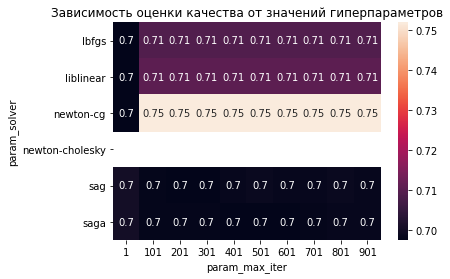

In [13]:
results_lr = grid_lr.cv_results_
lr = pd.DataFrame({'param_solver': results_lr['param_solver'], 
                   'param_max_iter': results_lr['param_max_iter'], 
                   'mean_score': results_lr['mean_test_score']})

scores_lr = lr.pivot('param_solver', 'param_max_iter', 'mean_score')
sns.heatmap(scores_lr, annot=True)
plt.title('Зависимость оценки качества от значений гиперпараметров')
plt.show()

# Дерево решений

In [14]:
model_dt = DecisionTreeClassifier(random_state=12345)
parametrs_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1,61,5)
    
}
grid_dt = GridSearchCV(model_dt, parametrs_dt, cv=3)
grid_dt.fit(features_train, target_train)
grid_dt.best_params_

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recen

{'criterion': 'entropy', 'max_depth': 6}

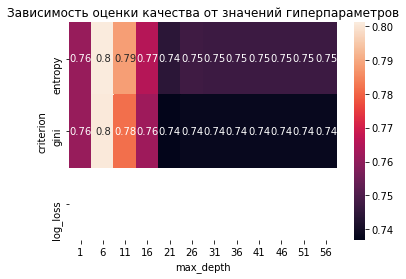

In [15]:
results_dt = grid_dt.cv_results_
dt = pd.DataFrame({'criterion': results_dt['param_criterion'], 
                   'max_depth': results_dt['param_max_depth'], 
                   'mean_score': results_dt['mean_test_score']})
dt['max_depth'] = dt['max_depth'].astype(int)
scores_dt = dt.pivot('criterion', 'max_depth', 'mean_score')
sns.heatmap(scores_dt, annot=True)
plt.title('Зависимость оценки качества от значений гиперпараметров')
plt.show()

In [16]:
predictions = grid_dt.predict(features_valid)
accuracy_dt = accuracy_score(target_valid, predictions)
accuracy_dt

0.7611650485436893

Наихудший результат показала Логистическая регрессия, наилучший - случайный лес, ее и возьмем за эталон

## Проверьте модель на тестовой выборке

In [17]:
score = grid_lr.score(features_test, target_test)
score

0.76049766718507

## (бонус) Проверьте модели на адекватность

генератор рандомных чисел? но как?

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b>

Можно посмотреть на баланс классов: например, если у нас 90 процентов таргета это "1", а остальные 10 - "0", то мы можем тупо выдавать каждый раз цифру 1 и получать метрику 90 %. Любая модель, которая будет выдавать качество ниже этого - плохая/неадекватная

In [18]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Есть отсутсвие баланса, т.е кол-во разных тарифов отличается в несколько раз, модели у которых кол-во угаданных ответов (accuracy) < 69% можно считать неадекватными. У нас таких нет и в целом, модели получились приемлимыми

# Общий вывод

Было исследовано 3 моедли:логистическая регрессия, случайный лес, дерево решений. В ходе обучения, точность моделей составила:

    
    логистическая регрессия - 71%
    случайный лес - 77%
    дерево решений - 76%
Cлучайный лес показал наилучший результат. Дерево решений тоже показало достойный результаты, в целом, его можно оставить. Логистическая регрессия показала худший резлуьтат, ее необходимо отмести.
Все данные были разбиты на тренировчоную, валидационную выборки и тестовые выборки

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
